# Regression on Earthquake Magnitude Prediction
##  Dataset: Global Earthquake-Tsunami Risk Assessment Dataset 
### https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset 
### Author: Adrian Khlim

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
earthquake_data = pd.read_csv('earthquake_data_tsunami.csv')
earthquake_data.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [40]:
earthquake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [41]:
earthquake_data.dtypes

magnitude    float64
cdi            int64
mmi            int64
sig            int64
nst            int64
dmin         float64
gap          float64
depth        float64
latitude     float64
longitude    float64
Year           int64
Month          int64
tsunami        int64
dtype: object

We saw that for Tsunami, it is an int, and we noticed 0s and 1s. I am assuming that is true or false, or number of tsunamis, so lets check.

In [42]:
# check unique values in the "tsunami" column
earthquake_data["tsunami"].unique()

array([1, 0], dtype=int64)

In [43]:
print("\n".join([col for col in earthquake_data.columns]))

magnitude
cdi
mmi
sig
nst
dmin
gap
depth
latitude
longitude
Year
Month
tsunami


Checking our null values, and fortunately we have none, so no need to drop rows or process data or averages for them.

In [44]:
earthquake_data.isnull().sum()

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

In [45]:
earthquake_data.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


# Data Understanding/Visualizations

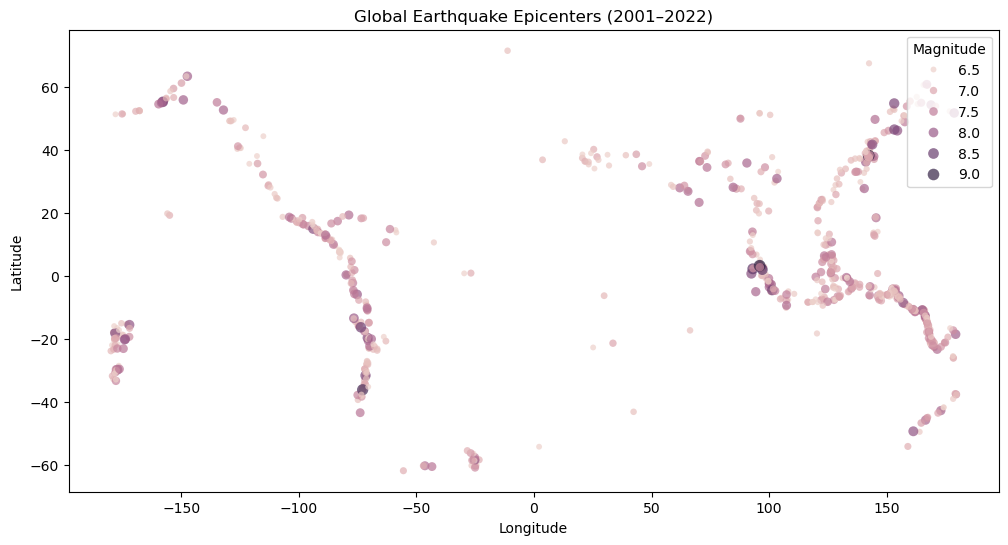

In [53]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=earthquake_data,
    x='longitude', y='latitude',
    hue='magnitude', size='magnitude', alpha=0.7, edgecolor='none'
)
plt.title('Global Earthquake Epicenters (2001–2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Magnitude', loc='upper right')
plt.show()


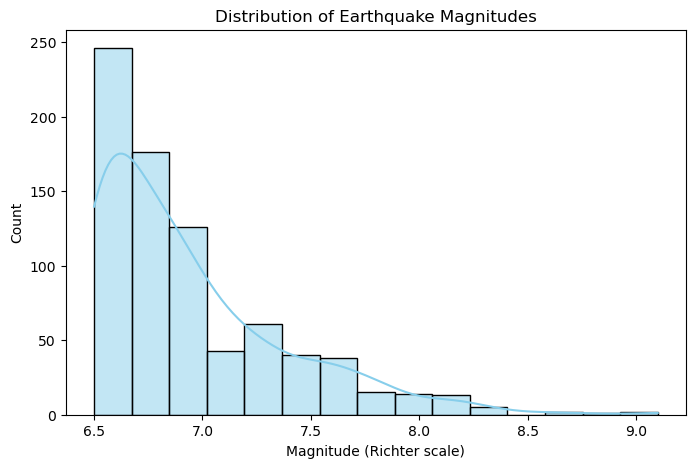

In [54]:
plt.figure(figsize=(8,5))
sns.histplot(earthquake_data['magnitude'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude (Richter scale)')
plt.ylabel('Count')
plt.show()


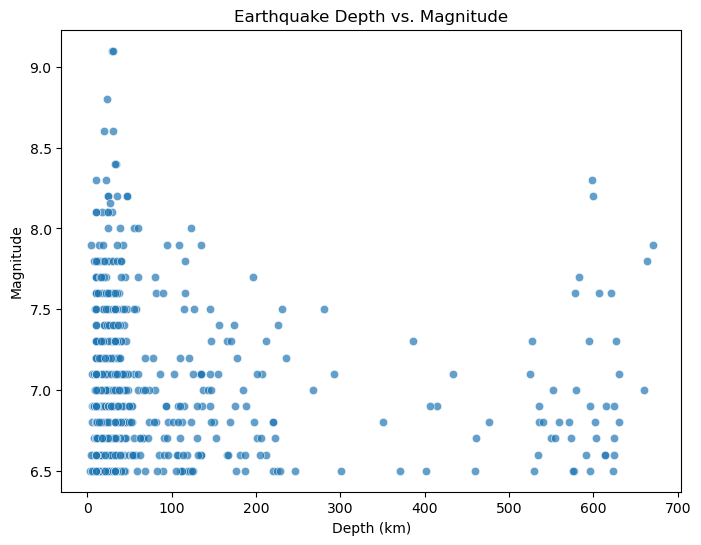

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=earthquake_data, x='depth', y='magnitude', alpha=0.7)
plt.title('Earthquake Depth vs. Magnitude')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()


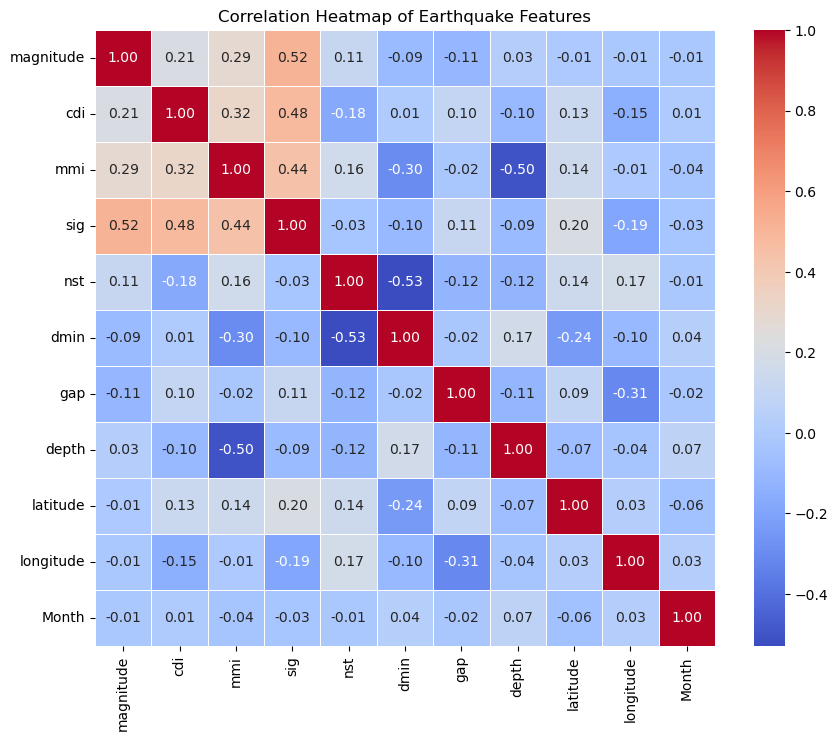

In [56]:
plt.figure(figsize=(10,8))
corr = earthquake_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Earthquake Features')
plt.show()


C:\Users\adria\AppData\Local\Temp\ipykernel_164888\2562585914.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=earthquake_data, palette='crest')


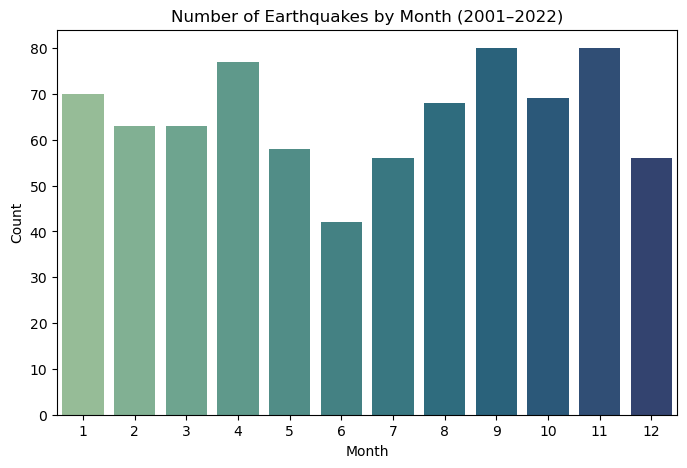

In [57]:
plt.figure(figsize=(8,5))
sns.countplot(x='Month', data=earthquake_data, palette='crest')
plt.title('Number of Earthquakes by Month (2001–2022)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


C:\Users\adria\AppData\Local\Temp\ipykernel_164888\457388477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=earthquake_data, x='mmi', y='magnitude', palette='magma')


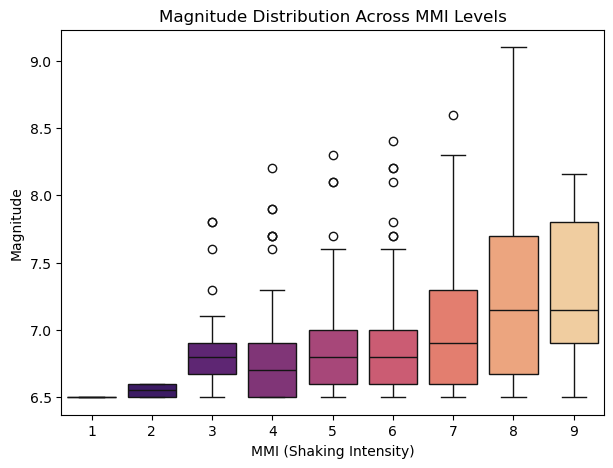

In [59]:
plt.figure(figsize=(7,5))
sns.boxplot(data=earthquake_data, x='mmi', y='magnitude', palette='magma')
plt.title('Magnitude Distribution Across MMI Levels')
plt.xlabel('MMI (Shaking Intensity)')
plt.ylabel('Magnitude')
plt.show()


# Data Preprocessing

Fortunately this data is "machine learning ready", and honestly seems so. No null values, data is pretty standardized and clean. The column headers may be confusing, but the names of some of them can be long, so I won't change them but will refer to the Kaggle source and explain when needed.

As for choosing features, there aren't too many, so I will use most of them here. I think I will drop Year though, because I don't think it is relevant. I am planning on predicting the magnitude of earthquakes, and I believe year would only matter if I had tectonic plate movement data. Month might matter due to seasons and weather and erosion and things like that, probably not, but I would like to see it. However, it could also be dropped.  Also, dropping tsunami is what I want to do because typically it takes time after an earthquake to happen, but realistically I am thinking scientists want to predict the magnitude as soon as it happens? And the earliest predictions would be before a tsunami.

In [46]:
earthquake_data.drop(columns=['Year', 'tsunami'], inplace=True)



In [47]:
earthquake_data.tail()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Month
777,7.7,0,8,912,427,0.0,0.0,60.0,13.0490,-88.660,1
778,6.9,5,7,745,0,0.0,0.0,36.4,56.7744,-153.281,1
779,7.1,0,7,776,372,0.0,0.0,103.0,-14.9280,167.170,1
780,6.8,0,5,711,64,0.0,0.0,33.0,6.6310,126.899,1
781,7.5,0,7,865,324,0.0,0.0,33.0,6.8980,126.579,1


In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
# Set up my X and y
X = earthquake_data.drop(columns=['magnitude'])
y = earthquake_data['magnitude']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)   
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 0.24989375290699603
Mean Squared Error: 0.11584578715627361
R^2 Score: 0.1608925043740852


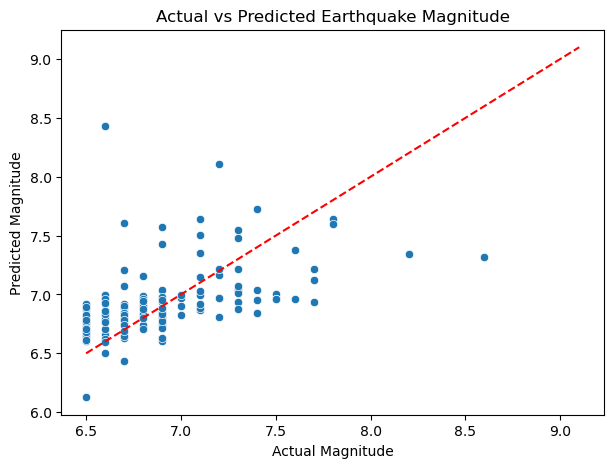

In [51]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("Actual vs Predicted Earthquake Magnitude")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


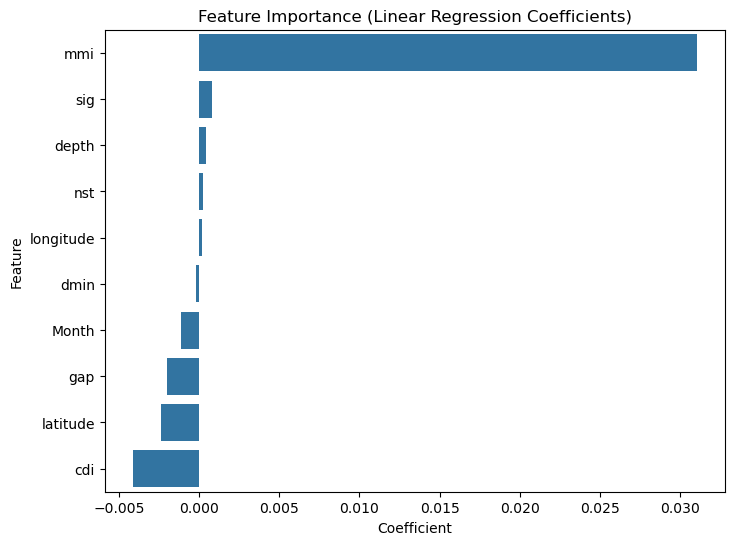

In [52]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.show()


So mmi has the highest correlation of 0.030, which is the Modified Mercalli Intensity (instrumental). This goes from 1-9, and is similar to magnitude but it is DURING the earthquake: or how strong the earthquake felt; the shaking intensity, and it relates to structural damage.